In [1]:
#Loading the data
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors


In [2]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
# Finding the total number of columns and entries as well as the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The output above shows: 
* Total number of features: 8
* Total number of entries: 200
* Data Types: int and object

In [5]:
#Finding the percentage of missing data in each column
(df.isna().sum()/len(df))*100

CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [6]:
#Cardinality for continuous and categorical variables using nunique()
df.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [7]:
#Descriptive statistics for numerical columns
df_num = df.select_dtypes(include=['int64'])
df_num.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#Descriptive statistics for categorical variables
df_cat = df.select_dtypes(include=["object"])
df_cat.describe()

,Genre
count,200
unique,2
top,Female
freq,112


#### Univariate Analysis of Continuous Features

In [9]:
df_num.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [10]:
df['CustomerID']

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: CustomerID, Length: 200, dtype: int64

In [11]:
#importing the needed libraries
import matplotlib.pyplot as plt
import seaborn as sns

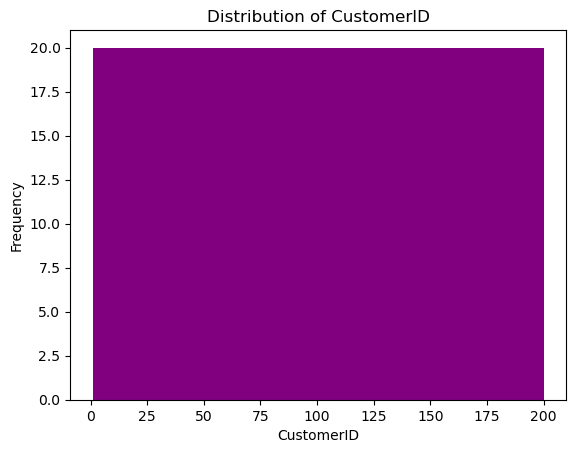

In [12]:
#the distribution of CustomerID
plt.hist(df_num.CustomerID, color="purple")
plt.ylabel("Frequency")
plt.xlabel ("CustomerID")
plt.title("Distribution of CustomerID")
plt.show()

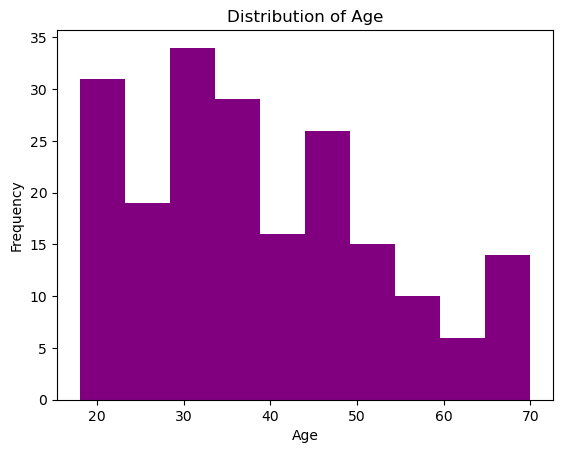

In [13]:
#the distribution of Age
plt.hist(df_num.Age, color="purple")
plt.ylabel("Frequency")
plt.xlabel ("Age")
plt.title("Distribution of Age")
plt.show()
#Slightly skewed right so majority of people seem to be under the 
#age of 50-40

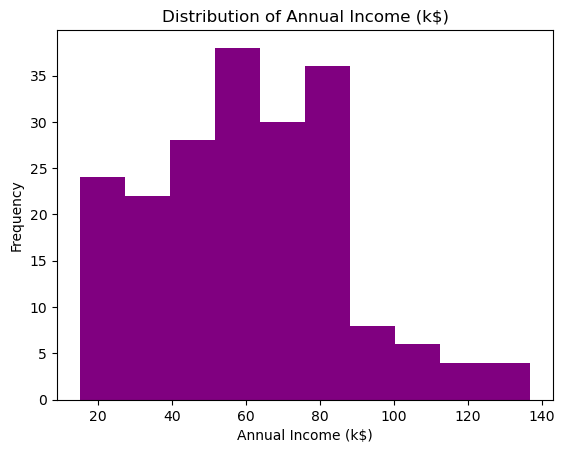

In [14]:
#the distribution of Annual Income (k$)
plt.hist(df_num['Annual Income (k$)'], color="purple")
plt.ylabel("Frequency")
plt.xlabel ("Annual Income (k$)")
plt.title("Distribution of Annual Income (k$)")
plt.show()
#Distribution appears to be bimodal at 50k and 80k

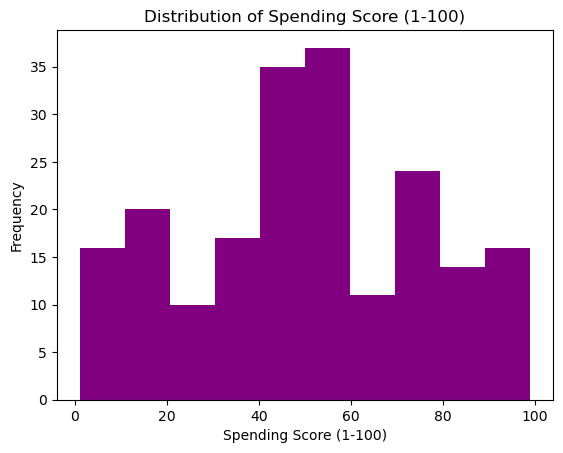

In [15]:
#the distribution of Spending Score (1-100)
plt.hist(df_num['Spending Score (1-100)'], color="purple")
plt.ylabel("Frequency")
plt.xlabel ("Spending Score (1-100)")
plt.title("Distribution of Spending Score (1-100)")
plt.show()
#distribution appears to be normal or maybe trimodal.

#### Univriate Analysis for Categorical Columns

In [16]:
df_cat.columns

Index(['Genre'], dtype='object')

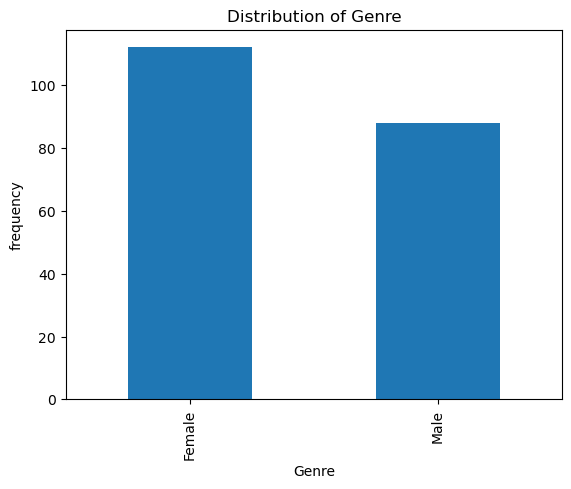

In [17]:
#Distribution of Genre
df_cat['Genre'].value_counts().plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel('frequency')
plt.title('Distribution of Genre')
plt.show()

Prepare for Clustering

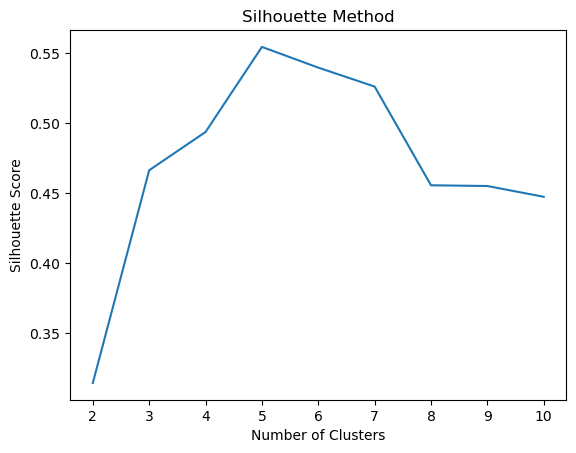

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Select the features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using silhouette method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Plot the silhouette scores for different numbers of clusters
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the 'Annual Income' and 'Spending Score' features
df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Create a new DataFrame with only the selected features
selected_features = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Initialize an empty dictionary to store silhouette scores for different cluster numbers
silhouette_scores = []

# Loop through different cluster numbers from 2 to 10
for n_clusters in range(2, 11):
    # Initialize the KMeans model with the current cluster number
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # Fit the KMeans model to the selected features
    kmeans.fit(selected_features)
    # Compute the silhouette score for the current cluster number
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))
    
# Find the optimal number of clusters with the highest silhouette score
#optimal_n_clusters = max(silhouette_scores, key=silhouette_scores.get)


In [25]:
# Initialize the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans model to the selected features
kmeans.fit(selected_features)

# Add the cluster assignments as a new column in the selected features DataFrame
selected_features['Cluster'] = kmeans.labels_



In [23]:
#obtain cluster assignments for each data point
selected_features

,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,0.387755,2
1,0.000000,0.816327,3
2,0.008197,0.051020,2
3,0.008197,0.775510,3
4,0.016393,0.397959,2
...,...,...,...
195,0.860656,0.795918,4
196,0.909836,0.275510,1
197,0.909836,0.744898,4
198,1.000000,0.173469,1


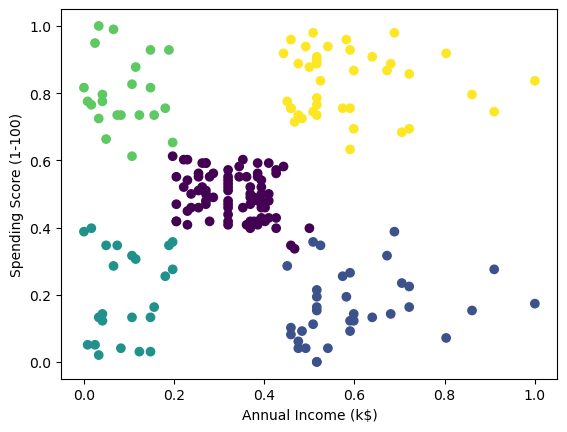

In [26]:
import matplotlib.pyplot as plt

# Create a scatter plot of 'Annual Income' vs 'Spending Score', colored by cluster assignment
plt.scatter(selected_features['Annual Income (k$)'], selected_features['Spending Score (1-100)'], c=selected_features['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Cluster Descriptions

#### Top Left Green
This cluster seems to be the worst case scenario. This cluster depics individuals who are of the lowest income and tend to spend the most money. They definitely need to re-evaluate their financials because a lifestyle like this may not be sustainable 

#### Bottom Left Aquamarine
This cluster depicts individuals who have low income but are also frugal with their spending. This is good since they realize they don't have the money to just do whatever with and are taking their financials quite seriously. Top left green cluster might learn a thing or two from them.

#### Middle Purple 
This cluster depicts those who are middle class and also have a not too high, but not too low spending score either. This cluster may be described as those who are living within their means. They aren't struggilng but they aren't going paycheck to paycheck either. Their 4-6 range of spending score indicates that they do occasionally spend money, but nothing like Green or Yellow.

#### Top Left Yellow
This cluster depicts those who make the most money out of the dataset, and also spend the most money. There's nothing inherently wrong with this, as long as they are living within their means. However, with how much money they make annually, they should be okay. 

#### Bottom Right Blue 
This cluster depicts those who make the most money out of the dataset, but also live quite frugally. They can be grouped as wealthy people who live economically. They are living well below their means which is never a bad thing. 

## Summary Report

##### Description of Dataset
The dataset is from a file called "Mall_Customers.csv" which contains information regarding CustomerID, their gender, age, annual income in U.S. Dollars, and a spending score that was calculated based on spending behavior. 

##### Steps for Data Preprocessing, Feature Selection and scaling
First, I loaded the dataset using Pandas and checked for missing values. In this case, there were no missing values, so I didn't need to handle them. Then, I checked the distribution of features using histograms and boxplots to gain insights about the data. I then chose the appropriate features for clustering based on the task at hand. In this case, I chose 'Annual Income' and 'Spending Score' as they were the most relevant features to determine customer segments based on their spending behavior. I finally performed feature scaling using the StandardScaler from Scikit-Learn to ensure that all the features were on the same scale. Standardization is important in clustering because it helps to avoid features with larger magnitudes from dominating the clustering process. In this case, I scaled the 'Annual Income' and 'Spending Score' features.

##### Determining optimal number of clusters
For each number of clusters k ranging from 2 to 10, i calculated the Silhouette score using the Silhouette Coefficient function from Scikit-Learn. Then I plotted a line graph of the Silhouette scores for each number of clusters and identified the optimal number of clusters as the one with the highest average Silhouette score. In this case, the optimal number of clusters was 5. Then the model was trained using 5 clusters and from there, I was able to see the cluster assignments for each data point. 

##### Description of Clusters and Characteristics 
The visualization seemed to put all the entries into 5 clusters. Each taking up a quadrant of the graph with one of the clusters being a "goldi-locks" middleground. The x axis shows annual income while the y axis shows their spending score. From that I discerned that each cluster represented a group of wealthy people who lived frugally, wealthy people that spent a lot of money, poor people who spent a lot of money, poor people that didn't spend that much money, and middle class people who lived within their means. 

##### Insights and recommendations 
If I was acting as a data analyst for an ecommerce company, I would want to target clusters who have high spending scores, and have seperate campaigns for those who are wealthy, and those who are poor. The same campagin may not appeal to these different groups. For example, luxury brands typically have two different lines to promote. Lines that are heavily branded, over the top and marketed to "people wanting to look rich" and lines that are much more subtle who are for the "if you know, you know" kind of people. 
 